In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
from mpl_toolkits.basemap import Basemap
%matplotlib notebook

In [2]:
df = pd.read_csv('US-salaries.csv')
df.head()

,Unnamed: 0,Salary,latd,longt
0,"El Paso, TX",65.497368,31.777576,-106.442456
1,"Indianapolis, IN",75.298944,39.768403,-86.158068
2,"Nashville, TN",76.190975,36.162664,-86.781602
3,"San Antonio, TX",76.352052,29.424122,-98.493628
4,"Jacksonville, FL",79.146182,30.332184,-81.655651


In [3]:
lat = df['latd'].values
lon = df['longt'].values
values = df['Salary'].values

font_color = '#525252'
hfont = {'fontname':'Calibri'}
line_color = '#d3d3d3'
title = 'Average IT salaries in US cities'
label_name = 'USD thousand per year'

<IPython.core.display.Javascript object>


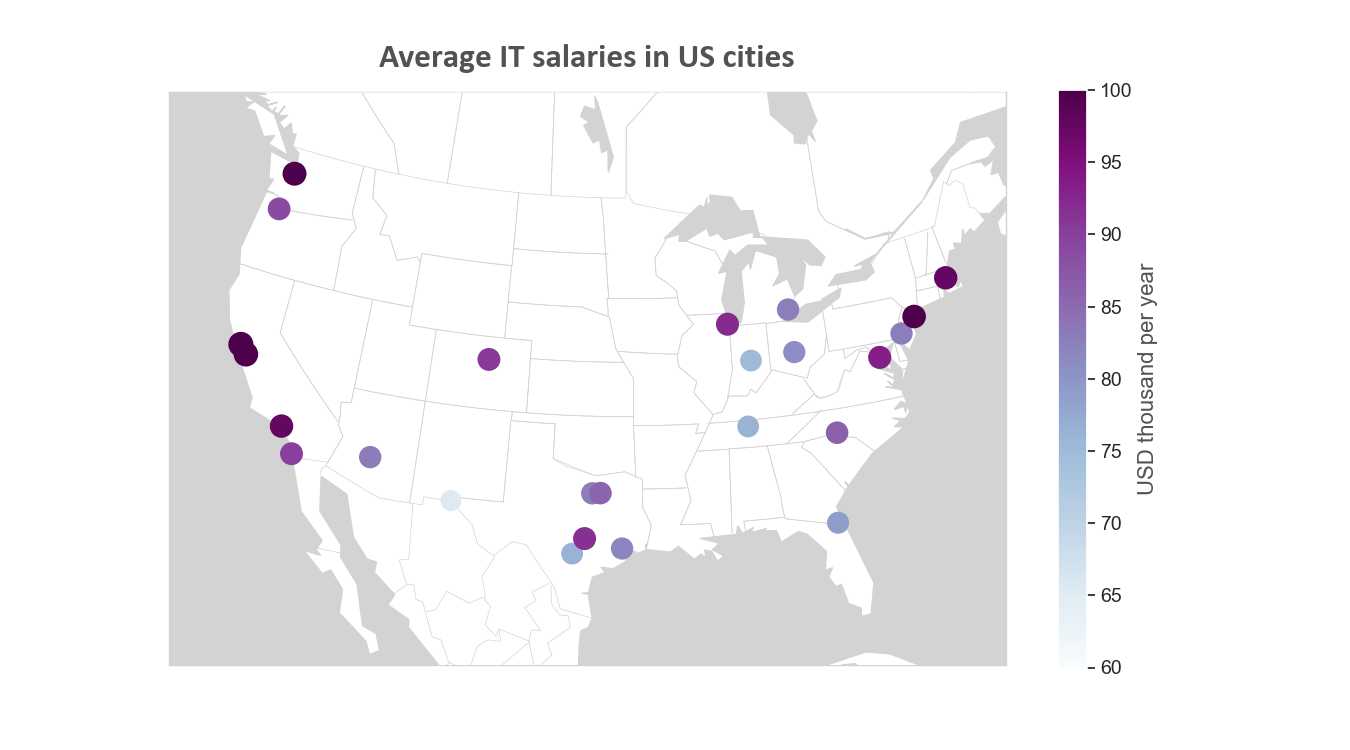

In [4]:
fig = plt.figure(figsize=(13.5,7.5))

m = Basemap(llcrnrlon=-121, llcrnrlat=20,
            urcrnrlon=-62,urcrnrlat=51, 
            projection='lcc',
            lat_1=32,lat_2=45,lon_0=-95)

m.drawcoastlines(color=line_color)
m.drawcountries(color=line_color)
m.drawstates(color=line_color)
m.drawmapboundary(color=line_color, fill_color=line_color, zorder=0)
m.fillcontinents(color='w',lake_color=line_color, zorder=1)

x, y = m(lon, lat)
m.scatter(x, y, s=values, c=values, cmap='BuPu', zorder=10, linewidths=7)

plt.title(title,fontsize=24, pad=18, color=font_color, fontweight='bold', **hfont)

cbar = plt.colorbar()
plt.clim(60,100)
cbar.set_label(label=label_name, size=16, color=font_color)
for l in cbar.ax.yaxis.get_ticklabels():
#   l.set_weight('bold')
    l.set_fontsize(14)

In [5]:
filename = 'basemap-salaries'
plt.savefig(filename+'.png')